# Apartment for Rent classified
- Dataset Information

- The dataset contains of 10'000 or 100'000 rows and of 22 columns The data has been cleaned in the way that 
column price and square_feet never is empty but the dataset is saved as it was created.

- Can be used for different machine learning tasks such as clustering, classification and also regression for the squares feet column

### Importing Packages

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

### Loading Dataset

In [81]:
df = pd.read_csv('apartments_for_rent_classified_10K.csv',delimiter=';',encoding='cp1252')
df.head()

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668626895,housing/rent/apartment,"Studio apartment 2nd St NE, Uhland Terrace NE,...","This unit is located at second St NE, Uhland T...",NaN,NaN,0.0,USD,No,Thumbnail,...,$790,Monthly,101,NaN,Washington,DC,38.9057,-76.9861,RentLingo,1577359415
1,5664597177,housing/rent/apartment,Studio apartment 814 Schutte Road,"This unit is located at 814 Schutte Road, Evan...",NaN,NaN,1.0,USD,No,Thumbnail,...,$425,Monthly,106,814 Schutte Rd,Evansville,IN,37.9680,-87.6621,RentLingo,1577017063
2,5668626833,housing/rent/apartment,"Studio apartment N Scott St, 14th St N, Arling...","This unit is located at N Scott St, 14th St N,...",NaN,1.0,0.0,USD,No,Thumbnail,...,"$1,390",Monthly,107,NaN,Arlington,VA,38.8910,-77.0816,RentLingo,1577359410
3,5659918074,housing/rent/apartment,Studio apartment 1717 12th Ave,"This unit is located at 1717 12th Ave, Seattle...",NaN,1.0,0.0,USD,No,Thumbnail,...,$925,Monthly,116,1717 12th Avenue,Seattle,WA,47.6160,-122.3275,RentLingo,1576667743
4,5668626759,housing/rent/apartment,"Studio apartment Washington Blvd, N Cleveland ...","This unit is located at Washington Blvd, N Cle...",NaN,NaN,0.0,USD,No,Thumbnail,...,$880,Monthly,125,NaN,Arlington,VA,38.8738,-77.1055,RentLingo,1577359401


## Exploratory Data Analysis
- Information about dataset 
- Describing Dataset 
- Checking for Categorical Columns
- Checking for N-Unique values 
- Checking for value counts
- Checking for the correlations (if possible)
- Splitting into features and label
- Plotting Featurev vs Label

## Exploratory Data Analysis

### Information about dataset 

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             10000 non-null  int64  
 1   category       10000 non-null  object 
 2   title          10000 non-null  object 
 3   body           10000 non-null  object 
 4   amenities      6451 non-null   object 
 5   bathrooms      9966 non-null   float64
 6   bedrooms       9993 non-null   float64
 7   currency       10000 non-null  object 
 8   fee            10000 non-null  object 
 9   has_photo      10000 non-null  object 
 10  pets_allowed   8252 non-null   object 
 11  price          10000 non-null  int64  
 12  price_display  10000 non-null  object 
 13  price_type     10000 non-null  object 
 14  square_feet    10000 non-null  int64  
 15  address        6673 non-null   object 
 16  cityname       9923 non-null   object 
 17  state          9923 non-null   object 
 18  latitud

### Describing Dataset 

In [83]:
df.describe()

,id,bathrooms,bedrooms,price,square_feet,latitude,longitude,time
count,1.000000e+04,9966.000000,9993.000000,10000.000000,10000.000000,9990.000000,9990.000000,1.000000e+04
mean,5.623396e+09,1.380544,1.744021,1486.277500,945.810500,37.695162,-94.652247,1.574891e+09
std,7.021025e+07,0.615410,0.942354,1076.507968,655.755736,5.495851,15.759805,3.762395e+06
min,5.508654e+09,1.000000,0.000000,200.000000,101.000000,21.315500,-158.022100,1.568744e+09
25%,5.509248e+09,1.000000,1.000000,949.000000,649.000000,33.679850,-101.301700,1.568781e+09
50%,5.668610e+09,1.000000,2.000000,1270.000000,802.000000,38.809800,-93.651600,1.577358e+09
75%,5.668626e+09,2.000000,2.000000,1695.000000,1100.000000,41.349800,-82.209975,1.577359e+09
max,5.668663e+09,8.500000,9.000000,52500.000000,40000.000000,61.594000,-70.191600,1.577362e+09


### Checking Categorical columns 

In [84]:
df_categorical = df.select_dtypes('object')
print(df_categorical.columns)

Index(['category', 'title', 'body', 'amenities', 'currency', 'fee',
       'has_photo', 'pets_allowed', 'price_display', 'price_type', 'address',
       'cityname', 'state', 'source'],
      dtype='object')


### Checking for N-unique values 

In [85]:
df.nunique()

id               10000
category             3
title             9350
body              9961
amenities         2254
bathrooms           14
bedrooms            10
currency             1
fee                  1
has_photo            3
pets_allowed         4
price             1725
price_display     1726
price_type           3
square_feet       1738
address           6658
cityname          1574
state               51
latitude          2395
longitude         2392
source              12
time              6310
dtype: int64

### Checking for Values count

In [86]:
df_categorical.value_counts()

category                title                                                 body                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        amenities                                     

### Checking for NaN values

In [87]:
df.isnull().sum()

id                  0
category            0
title               0
body                0
amenities        3549
bathrooms          34
bedrooms            7
currency            0
fee                 0
has_photo           0
pets_allowed     1748
price               0
price_display       0
price_type          0
square_feet         0
address          3327
cityname           77
state              77
latitude           10
longitude          10
source              0
time                0
dtype: int64

### Plotting Price vs Square Feet

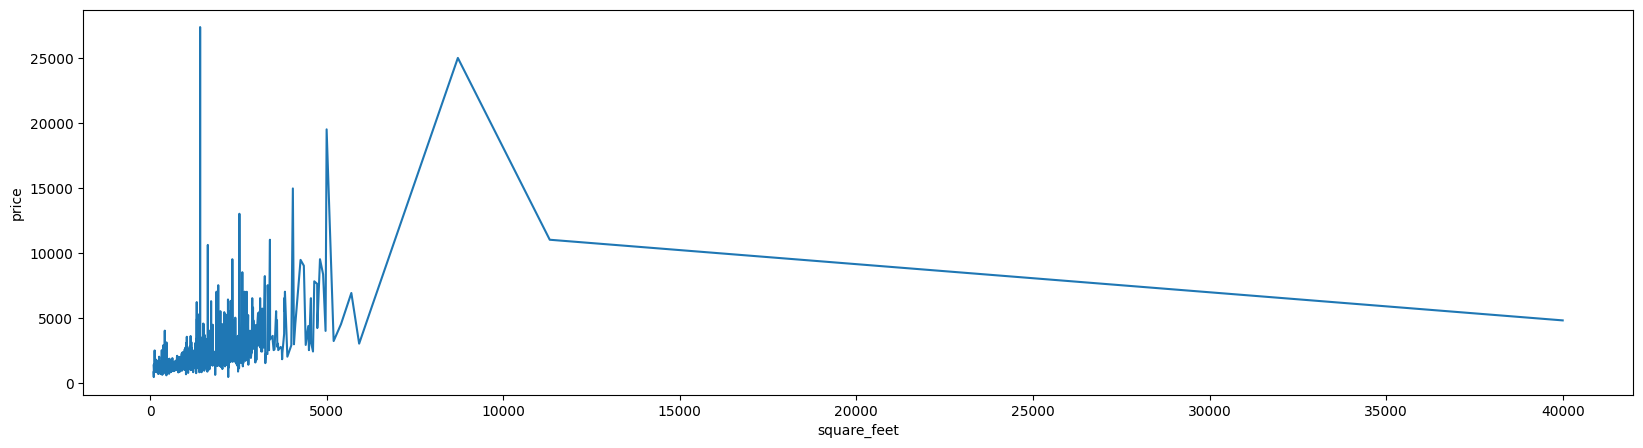

In [88]:
plt.figure(figsize=(20,5))
avg_sqrFeet_price = df.groupby('square_feet')['price'].mean().reset_index()
avg_price_sqrFeet  = avg_sqrFeet_price.sort_values(by='price',ascending=False)
sns.lineplot(x='square_feet',y='price',data=avg_price_sqrFeet)
plt.show()

### Plotting City name vs Price

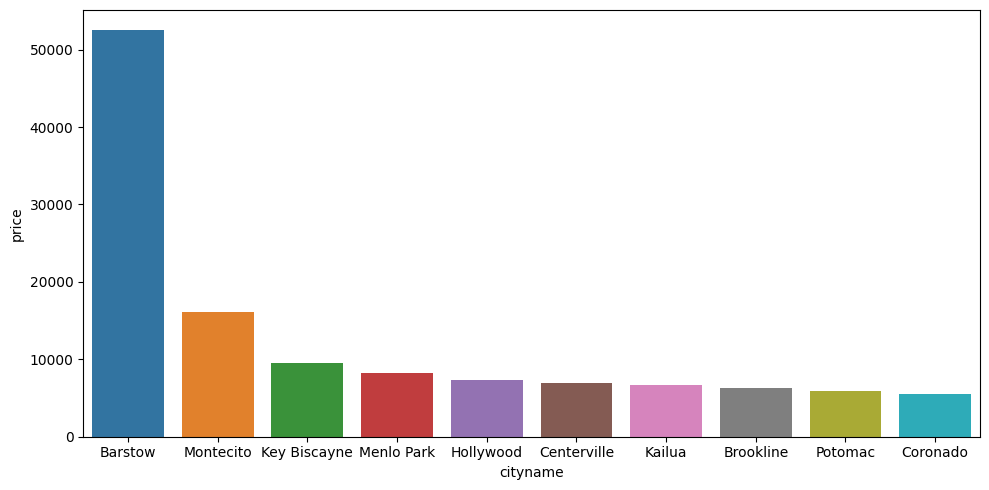

In [89]:
plt.figure(figsize=(10,5))
avg_price_by_city = df.groupby('cityname')['price'].mean().reset_index()
avg_city_by_price = avg_price_by_city.sort_values(by='price',ascending=False)
sns.barplot(x='cityname',y='price',data=avg_city_by_price.head(10))
plt.tight_layout()
plt.show()

### Plotting States vs price

[]

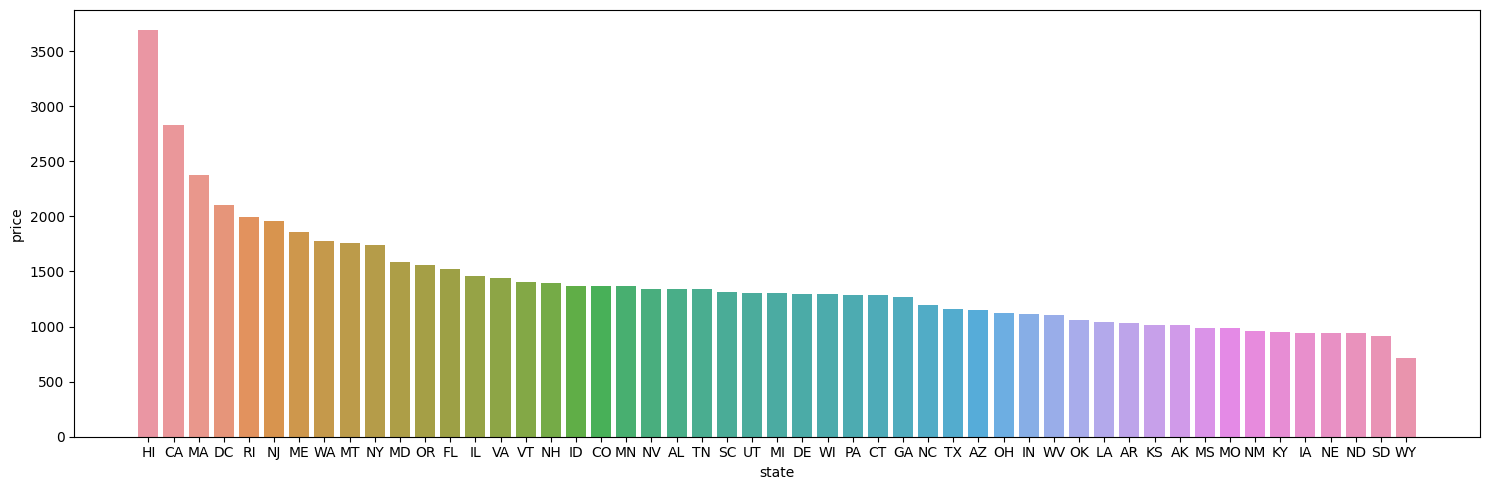

In [90]:
plt.figure(figsize=(15,5))
state_mean_price = df.groupby('state')['price'].mean().reset_index()
avg_state_price = state_mean_price.sort_values(by='price',ascending=False)
sns.barplot(x='state',y='price',data=avg_state_price)
plt.tight_layout()
plt.plot()

### Splitting Features and Label
- Dropping featuers: Body, Title, Address (Reason: It mostly has unique values for most of the instances which defines that mostly each instance has unique value which cannot contribute in training of machine learning model)

In [107]:
df_features = df.drop(["square_feet",'id','source','time','currency','fee','address'],axis=1)
df_label = df[['square_feet']]
print(df_features.info())
print(df_label.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   category       10000 non-null  object 
 1   title          10000 non-null  object 
 2   body           10000 non-null  object 
 3   amenities      6451 non-null   object 
 4   bathrooms      9966 non-null   float64
 5   bedrooms       9993 non-null   float64
 6   has_photo      10000 non-null  object 
 7   pets_allowed   8252 non-null   object 
 8   price          10000 non-null  int64  
 9   price_display  10000 non-null  object 
 10  price_type     10000 non-null  object 
 11  cityname       9923 non-null   object 
 12  state          9923 non-null   object 
 13  latitude       9990 non-null   float64
 14  longitude      9990 non-null   float64
dtypes: float64(4), int64(1), object(10)
memory usage: 1.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
D

## Data Preprocessing
- Encoding 
- Checking for an outliers
- Removing outliers
- Finding missing values
- Standard Scaler
- train test split

In [92]:
df_categorical = df_features.select_dtypes('object')
print(df_categorical.head(10))

                 category                                              title  \
0  housing/rent/apartment  Studio apartment 2nd St NE, Uhland Terrace NE,...   
1  housing/rent/apartment                  Studio apartment 814 Schutte Road   
2  housing/rent/apartment  Studio apartment N Scott St, 14th St N, Arling...   
3  housing/rent/apartment                     Studio apartment 1717 12th Ave   
4  housing/rent/apartment  Studio apartment Washington Blvd, N Cleveland ...   
5  housing/rent/apartment                          0 BR in New York NY 10019   
6  housing/rent/apartment                   Studio apartment 2432 Penmar Ave   
7  housing/rent/apartment  Studio apartment Oak St NW, 16th St NW, Washin...   
8  housing/rent/apartment                       Studio apartment 333 Hyde St   
9  housing/rent/apartment   Studio apartment A St SE, 19th St SE, Washington   

                                                body  \
0  This unit is located at second St NE, Uhland T...   
1  This

### Encoding on categical features

In [93]:
encoder = OrdinalEncoder()
df_features_encoded = encoder.fit_transform(df_features)
df_features_encoded = pd.DataFrame(df_features_encoded,columns=df_features.columns)
print(df_features_encoded.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   category       10000 non-null  float64
 1   title          10000 non-null  float64
 2   body           10000 non-null  float64
 3   amenities      6451 non-null   float64
 4   bathrooms      9966 non-null   float64
 5   bedrooms       9993 non-null   float64
 6   has_photo      10000 non-null  float64
 7   pets_allowed   8252 non-null   float64
 8   price          10000 non-null  float64
 9   price_display  10000 non-null  float64
 10  price_type     10000 non-null  float64
 11  address        6673 non-null   float64
 12  cityname       9923 non-null   float64
 13  state          9923 non-null   float64
 14  latitude       9990 non-null   float64
 15  longitude      9990 non-null   float64
dtypes: float64(16)
memory usage: 1.2 MB
None


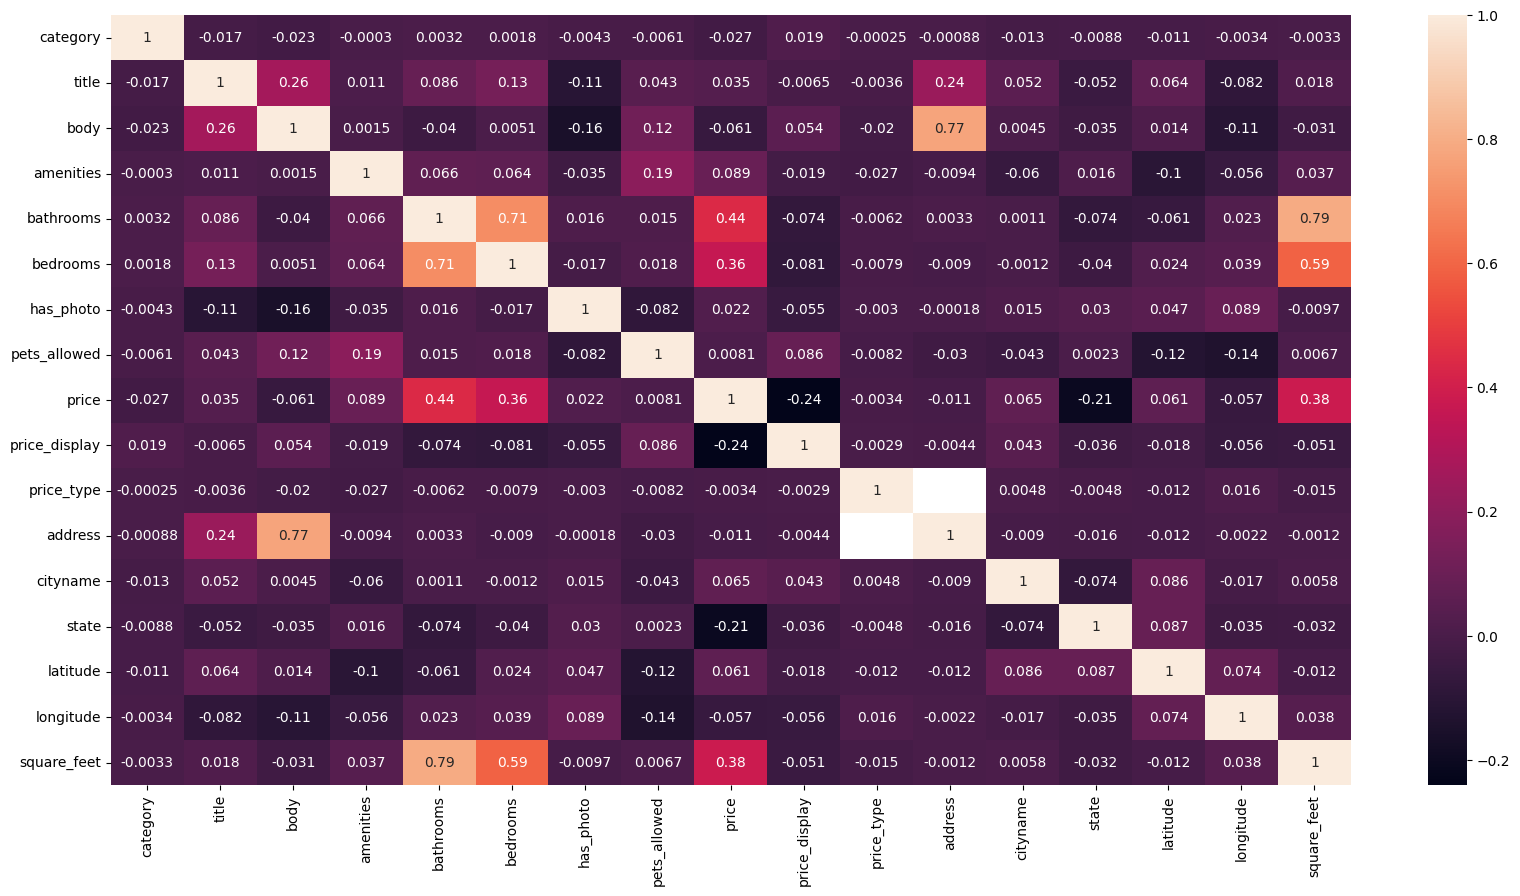

In [94]:
plt.figure(figsize=(20,10))
df_correlations  = pd.concat([df_features_encoded,df_label],axis=1).corr()
df_correlations_plot = sns.heatmap(df_correlations,annot=True)
plt.show()

### Checking for an outliers
- Data has few number of outliers so removing outliers doesnt required

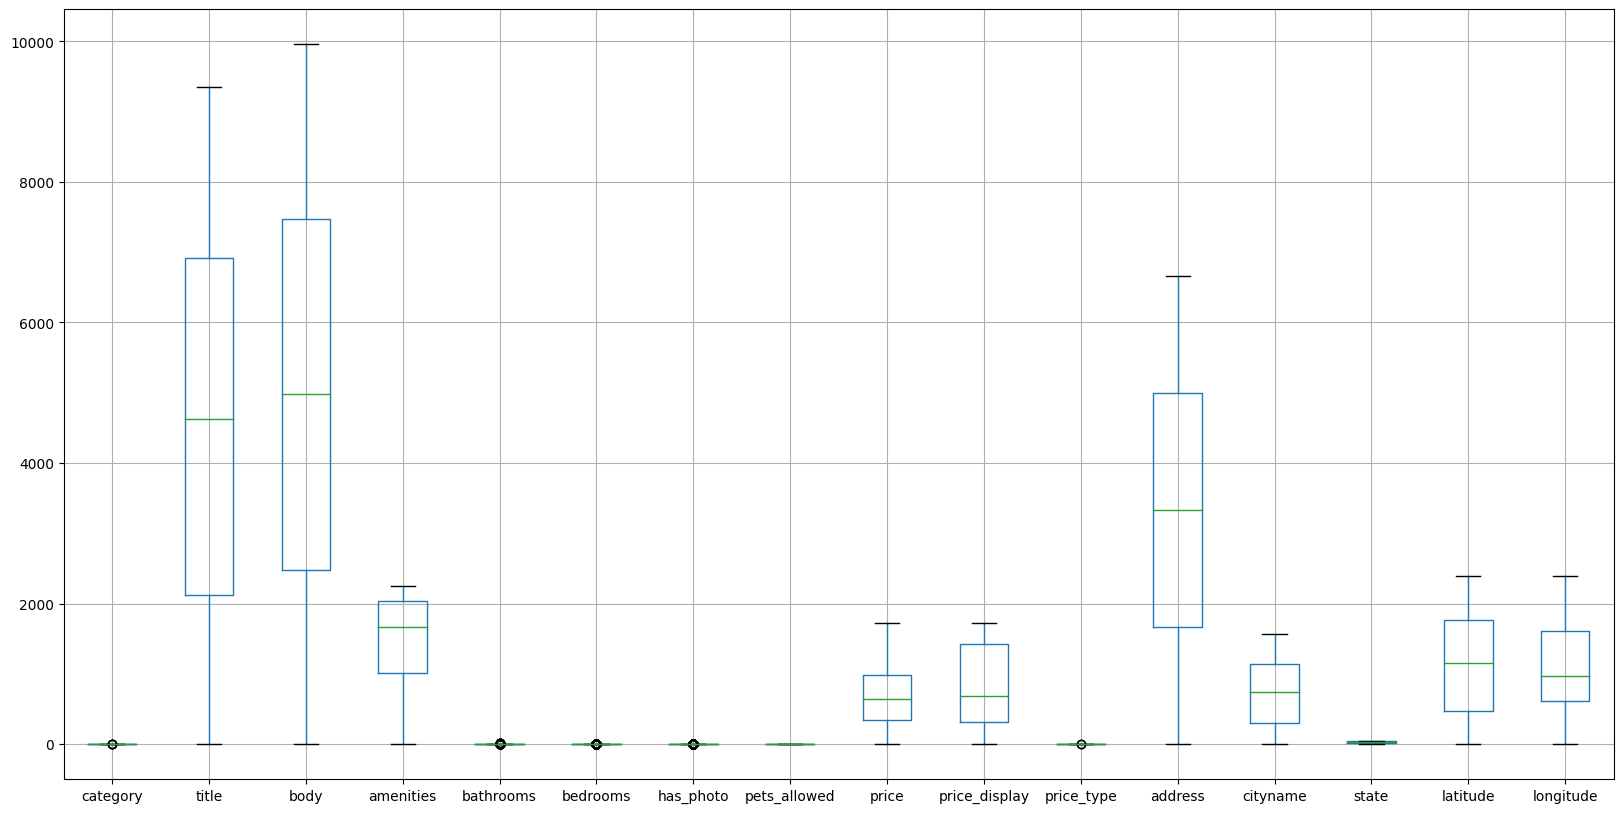

In [95]:
plt.figure(figsize=(20,10))
df_features_encoded.boxplot()
plt.show()

### Checking for missing values

In [96]:
print(df_features_encoded.isnull().sum())

category            0
title               0
body                0
amenities        3549
bathrooms          34
bedrooms            7
has_photo           0
pets_allowed     1748
price               0
price_display       0
price_type          0
address          3327
cityname           77
state              77
latitude           10
longitude          10
dtype: int64


### Handling missing values

In [97]:
imputer = SimpleImputer()
df_features_noNaN = imputer.fit_transform(df_features_encoded)
df_features_noNaN = pd.DataFrame(df_features_noNaN,columns=df_features.columns)
df_features_noNaN.head()

,category,title,body,amenities,bathrooms,bedrooms,has_photo,pets_allowed,price,price_display,price_type,address,cityname,state,latitude,longitude
0,0.0,5997.0,9385.0,1461.164626,0.760486,0.0,1.0,3.0,207.0,1528.0,0.0,3329.798741,1468.0,7.0,1177.0,1987.0
1,0.0,6365.0,8380.0,1461.164626,0.760486,1.0,1.0,3.0,16.0,1293.0,0.0,6064.000000,449.0,15.0,1080.0,1205.0
2,0.0,6446.0,9144.0,1461.164626,0.000000,0.0,1.0,3.0,738.0,343.0,0.0,3329.798741,52.0,45.0,1173.0,1967.0
3,0.0,5823.0,4286.0,1461.164626,0.000000,0.0,1.0,3.0,329.0,1660.0,0.0,1741.000000,1285.0,47.0,2343.0,79.0
4,0.0,6461.0,9310.0,1461.164626,0.760486,0.0,1.0,3.0,287.0,1614.0,0.0,3329.798741,52.0,45.0,1165.0,1963.0


### Checking for the correlations

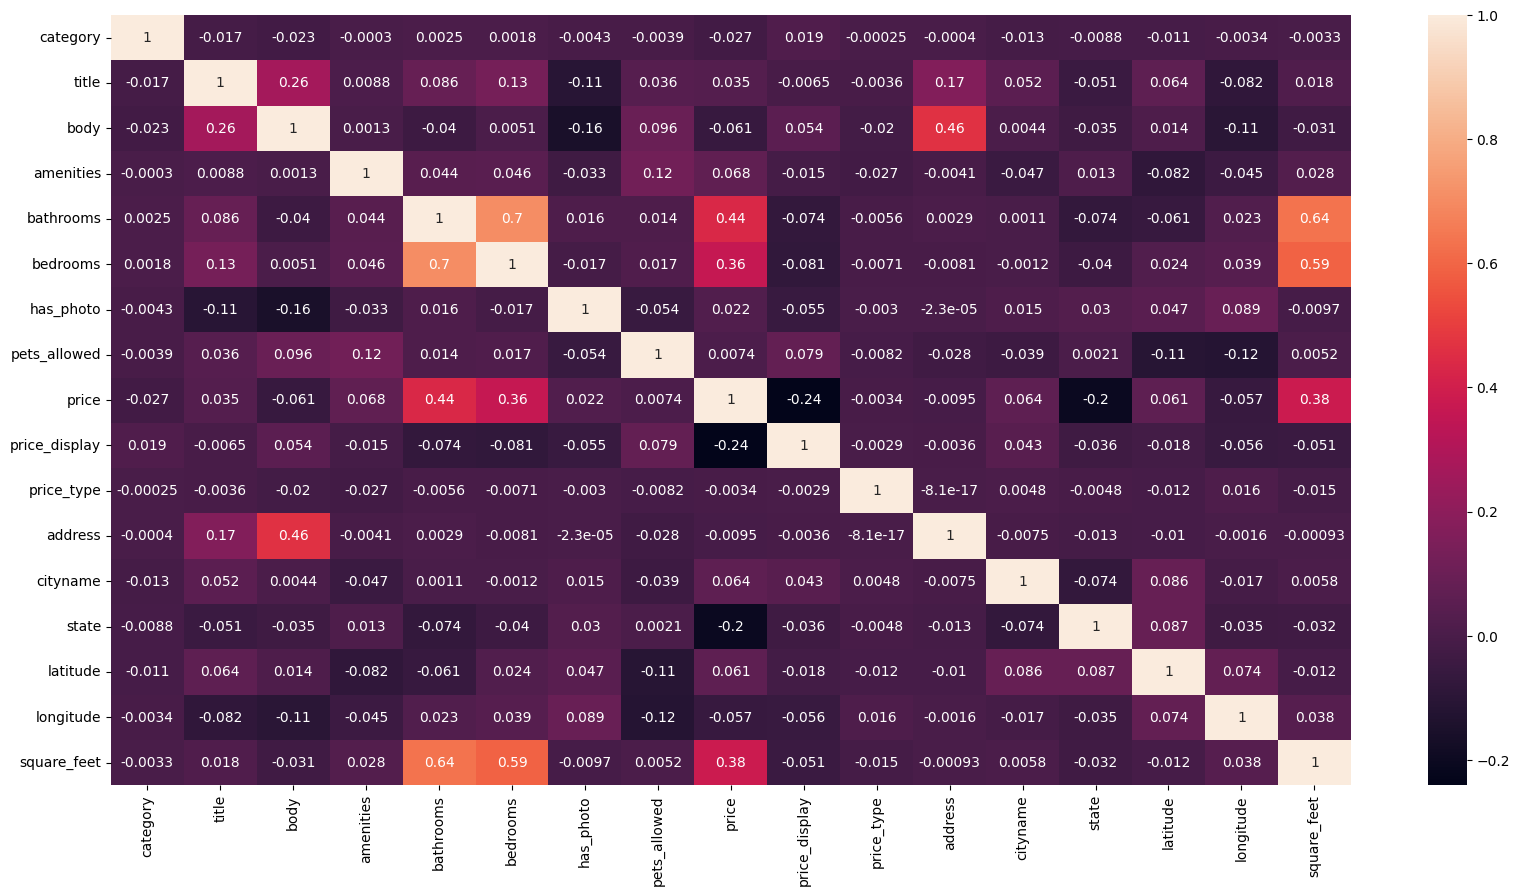

In [98]:
plt.figure(figsize=(20,10))
df_correlations  = pd.concat([df_features_noNaN,df_label],axis=1).corr()
df_correlations_plot = sns.heatmap(df_correlations,annot=True)
plt.show()

### Standard Scaler

In [99]:
scaler = StandardScaler()
df_features_scaler = scaler.fit_transform(df_features_noNaN)
df_features_scaler = pd.DataFrame(df_features_scaler,columns=df_features.columns)
df_features_scaler.head()

,category,title,body,amenities,bathrooms,bedrooms,has_photo,pets_allowed,price,price_display,price_type,address,cityname,state,latitude,longitude
0,-0.018977,0.516467,1.528921,1.618126e-13,-1.815938e-16,-1.851447,-0.224766,1.646216,-1.148794,1.256019,-0.013418,8.421755e-14,1.636762,-1.269347,0.037633,1.388788
1,-0.018977,0.650494,1.180315,1.618126e-13,-1.815938e-16,-0.789850,-0.224766,1.646216,-1.600486,0.842347,-0.013418,1.740083e+00,-0.611353,-0.746678,-0.095841,0.202648
2,-0.018977,0.679994,1.445325,1.618126e-13,-6.219448e-01,-1.851447,-0.224766,1.646216,0.106955,-0.829940,-0.013418,8.421755e-14,-1.487214,1.213329,0.032129,1.358452
3,-0.018977,0.453096,-0.239777,1.618126e-13,-6.219448e-01,-1.851447,-0.224766,1.646216,-0.860279,1.488379,-0.013418,-1.011133e+00,1.233028,1.343997,1.642073,-1.505272
4,-0.018977,0.685457,1.502906,1.618126e-13,-1.815938e-16,-1.851447,-0.224766,1.646216,-0.959604,1.407405,-0.013418,8.421755e-14,-1.487214,1.213329,0.021120,1.352385


### Train test split

In [100]:
X_train, X_test, y_train, y_test = train_test_split(df_features_scaler,df_label,test_size=0.2,random_state=42)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(8000, 16) (2000, 16)
(8000, 1) (2000, 1)


## Model Buiding
- Model selection
- Model Evaluation
    - Cross Validation Score
    - Cross Validation Predict
    - Mean Squared Error
    - Mean Aboslute Error
    - R Squared
- Model Hyperparameter 
- Model fit on test set

### Model Selection

In [101]:
linear_reg = LinearRegression()
elastic_net = ElasticNet()
forest_reg = RandomForestRegressor()
tree_reg = DecisionTreeRegressor()
svr_reg  = SVR()

### Model Evaluation

### Cross Validation Score

In [102]:
linear_y_train_score =  cross_val_score(estimator=linear_reg,X=X_train,y=y_train,cv=5,scoring='neg_mean_squared_error')
elastic_y_train_score =  cross_val_score(estimator=elastic_net,X=X_train,y=y_train,cv=5,scoring='neg_mean_squared_error')
forest_y_train_score =  cross_val_score(estimator=forest_reg,X=X_train,y=y_train,cv=5,scoring='neg_mean_squared_error')
tree_y_train_score =  cross_val_score(estimator=tree_reg,X=X_train,y=y_train,cv=5,scoring='neg_mean_squared_error')
svr_y_train_score =  cross_val_score(estimator=svr_reg,X=X_train,y=y_train,cv=5,scoring='neg_mean_squared_error')
print(linear_y_train_score.mean())
print(elastic_y_train_score.mean())
print(forest_y_train_score.mean())
print(tree_y_train_score.mean())
print(svr_y_train_score.mean())

c:\Users\Dhrumil Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\Dhrumil Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\Dhrumil Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\Dhrumil

-82113.32704492641
-91662.51711218603
-55600.29671390001
-103759.09412499999
-206904.8605954025


### Cross Validation Predict

In [103]:
linear_y_train_pred =  cross_val_predict(estimator=linear_reg,X=X_train,y=y_train,cv=5)
elastic_y_train_pred =  cross_val_predict(estimator=elastic_net,X=X_train,y=y_train,cv=5)
forest_y_train_pred =  cross_val_predict(estimator=forest_reg,X=X_train,y=y_train,cv=5)
tree_y_train_pred =  cross_val_predict(estimator=tree_reg,X=X_train,y=y_train,cv=5)
svr_y_train_pred =  cross_val_predict(estimator=svr_reg,X=X_train,y=y_train,cv=5)

c:\Users\Dhrumil Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:1050: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\Dhrumil Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:1050: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\Dhrumil Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:1050: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\Dhru

### Display Score
- Mean Squared Error
- Mean Aboslute Error
- R Squared

In [104]:
def display_score(estimator,ytrue,ypred):
    mse = mean_squared_error(ytrue,ypred)
    mae = mean_absolute_error(ytrue,ypred)
    r2 = r2_score(ytrue,ypred)
    print(f"Estimator: {estimator}")
    print(mse)
    print(mae)
    print(r2)

display_score(linear_reg,y_train,linear_y_train_pred)
display_score(elastic_net,y_train,elastic_y_train_pred)
display_score(forest_reg,y_train,forest_y_train_pred)
display_score(tree_reg,y_train,tree_y_train_pred)
display_score(svr_reg,y_train,svr_y_train_pred)

Estimator: LinearRegression()
82113.32704492641
189.67627998862548
0.7107003623006012
Estimator: ElasticNet()
91662.51711218605
183.1400686289908
0.6770568926447019
Estimator: RandomForestRegressor()
56102.520709837496
136.55889125000002
0.8023409901964038
Estimator: DecisionTreeRegressor()
103056.215125
183.932875
0.6369148983328651
Estimator: SVR()
206904.86059540254
244.32181099754547
0.27103792572252094


### Model Hyper parameter Tuning
- Decision Tree Regressor is likely to fit better on data and giving us low accuracy we could fit our final data on that estimator.

In [105]:
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [500]
}

grid_search = GridSearchCV(estimator=svr_reg,param_grid=param_grid,return_train_score=True,cv=3)
grid_search.fit(X_train,y_train)
print(grid_search.best_score_)
print(grid_search.best_params_)
print(grid_search.best_estimator_)

c:\Users\Dhrumil Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Dhrumil Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Dhrumil Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Dhrumil Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn

0.7365679735150472
{'C': 500, 'kernel': 'poly'}
SVR(C=500, kernel='poly')


### Model fitting on test set

In [106]:
final_model = grid_search.best_estimator_
svr_reg.fit(X_train,y_train)
y_test_pred = final_model.predict(X_test)
display_score(estimator=final_model,ytrue=y_test,ypred=y_test_pred)

c:\Users\Dhrumil Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Estimator: SVR(C=500, kernel='poly')
832913.6670645552
184.02657580443676
0.1790076835193819


### `NOTE:` Still working on this model. Updated commits will be released soon. For more visit: www.github.com/itechdp